# MFCC e SVM para classificar audios com dimensão reduzida

Autora: Fernanda Ferreira

Orientador: Tiago Tavares
    
Data: 08/11/2018

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
from scipy.io.wavfile import read
import librosa
import sklearn
from sklearn import svm
from sklearn import metrics
from sklearn.cross_validation import train_test_split
import numpy as np
from scipy.stats import skew

/home/fernanda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# Carregamento dos audios limpos, utilizando os 13 primeiros coeficientes

datas = glob.glob('fernanda_audios/*.wav')
labels = list(open('labels_MFCC.txt', 'r'))

list_coeffs =[]

for file in sorted(datas):
    #input(file)
    audio, fs = librosa.core.load(file, sr=44100, mono=True)
    coeff = librosa.feature.mfcc(audio, fs, S=None, n_mfcc=13, dct_type=2, norm='ortho').T
    coeff_trunc = np.hstack((np.mean(coeff, axis=0), np.std(coeff, axis=0)))
    list_coeffs.append(coeff_trunc)

#labels_coeff = ['academia']*features.shape[0]
#labels_name = labels[1]

In [3]:
print (list_coeffs)
features = np.vstack(list_coeffs)

#print(len(list_coeffs))
print (features.shape)

[array([-331.25883123,  122.25880448,   28.22289265,   48.19860759,
         10.91175209,   23.49344094,   -0.50861588,  -13.80929233,
          7.13624095,   -3.58047829,   -7.40367735,   -2.17608047,
         -3.97841696,   90.04354104,   45.00523213,   23.58347115,
         34.89334429,   14.23899   ,    9.76369227,   13.2070117 ,
         19.15685391,   12.23366275,   13.52323744,   15.49344813,
          8.26034598,    7.87755291]), array([-393.8383379 ,  125.12945407,   34.82533528,   46.40573019,
         17.29598825,   20.3142363 ,   -2.83928573,   -9.61736823,
          4.63670542,   -7.47811415,   -8.4021519 ,   -3.96065107,
         -1.53552616,   86.39697954,   43.14335536,   20.33224749,
         32.74733654,   12.89939256,   10.52351598,   17.45979936,
         15.14112153,   13.39986311,   11.68049441,   16.44916344,
          8.78590675,    6.07365253]), array([-354.50110038,  145.93451617,   15.13584655,   40.87412086,
          9.82565567,   10.27872626,   -8.54285798

In [4]:
# Cross-Validation
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42, stratify=labels)

s = sklearn.preprocessing.StandardScaler()
x_train = s.fit_transform(x_train)
x_test = s.transform(x_test)

print (x_train.shape) 
print (x_test.shape)
print (len(y_train))

(3200, 26)
(800, 26)
3200


In [5]:
#classificador = svm.SVC(kernel='linear')
classificador = svm.SVC(kernel = 'rbf', C = 100, gamma = 'auto', probability=False)
classificador.fit(x_train, y_train)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [6]:
#Predict the response for test dataset
y_pred = classificador.predict(x_test)

In [10]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_pred, y_test))


Accuracy: 0.99625


[[80  0  0  0  0  0  0  0  0  0]
 [ 0 78  0  0  0  0  0  0  2  0]
 [ 0  0 80  0  0  0  0  0  0  0]
 [ 0  0  0 80  0  0  0  0  0  0]
 [ 0  0  0  0 80  0  0  0  0  0]
 [ 0  0  0  0  0 80  0  0  0  0]
 [ 0  0  0  0  0  0 80  0  0  0]
 [ 0  0  0  0  0  0  0 80  0  0]
 [ 0  1  0  0  0  0  0  0 79  0]
 [ 0  0  0  0  0  0  0  0  0 80]]
             precision    recall  f1-score   support

  ACADEMIA
       1.00      1.00      1.00        80
 AEROPORTO
       0.99      0.97      0.98        80
      CASA
       1.00      1.00      1.00        80
    CINEMA
       1.00      1.00      1.00        80
    ESCOLA
       1.00      1.00      1.00        80
 FACULDADE
       1.00      1.00      1.00        80
  FARMACIA
       1.00      1.00      1.00        80
  HOSPITAL
       1.00      1.00      1.00        80
   MERCADO
       0.98      0.99      0.98        80
  TRABALHO
       1.00      1.00      1.00        80

avg / total       1.00      1.00      1.00       800



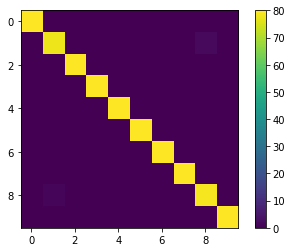

In [8]:
C = metrics.confusion_matrix(y_test, y_pred)
print (C)
print (metrics.classification_report(y_test, y_pred))
plt.imshow(C)
plt.colorbar()
plt.show()

In [ ]:
# Normalização
#coeff_mean = features.mean(axis=0)
#coeff_std = features.std(axis=0)
#scaler = sklearn.preprocessing.StandardScaler()
#features_scaled = scaler.fit_transform(features)
#features_scaled.mean(axis=0)
#features_scaled.std(axis=0)

#print (features_scaled.shape)
#features_real = numpy.vstack((feature_scaled, feature2_scaled))

## Referências

- https://musicinformationretrieval.com/genre_recognition.html
- https://github.com/tiagoft/inteligencia_computacional/blob/master/svm.ipynb
- https://www.kaggle.com/anmour/svm-using-mfcc-features#